In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('kiva_loans_20181016_20percent data.csv')
df.head(300)

,id,date,activity,sector,use,funded_amount,loan_amount,diff_funded_loan,status,country_code,country,currency,gender,borrower_genders,lender_count,term_in_months,repayment_interval,tags
0,653051,1/1/14,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",300,300,0,1,PK,Pakistan,PKR,female,female,12,12,irregular,NaN
1,653053,1/1/14,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,575,575,0,1,PK,Pakistan,PKR,group,"female, female",14,11,irregular,NaN
2,653068,1/1/14,Transportation,Transportation,To repair their old cycle-van and buy another ...,150,150,0,1,IN,India,INR,female,female,6,43,bullet,"user_favorite, user_favorite"
3,653063,1/1/14,Embroidery,Arts,to purchase an embroidery machine and a variet...,200,200,0,1,PK,Pakistan,PKR,female,female,8,11,irregular,NaN
4,653084,1/1/14,Milk Sales,Food,to purchase one buffalo.,400,400,0,1,PK,Pakistan,PKR,female,female,16,14,monthly,NaN
5,1080148,1/1/14,Services,Services,purchase leather for my business using ksh 20000.,250,250,0,1,KE,Kenya,KES,female,female,6,4,irregular,NaN
6,653067,1/1/14,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,200,200,0,1,IN,India,INR,female,female,8,43,bullet,"user_favorite, user_favorite"
7,653078,1/1/14,Beauty Salon,Services,to buy more hair and skin care products.,400,400,0,1,PK,Pakistan,PKR,female,female,8,14,monthly,"#Elderly, #Woman Owned Biz"
8,653082,1/1/14,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",475,475,0,1,PK,Pakistan,PKR,female,female,19,14,monthly,user_favorite
9,653048,1/1/14,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",625,625,0,1,PK,Pakistan,PKR,female,female,24,11,irregular,NaN


In [3]:
df.shape

(150000, 18)

In [4]:
df.status.value_counts()

1    142267
0      7733
Name: status, dtype: int64

In [5]:
df.dtypes

id                     int64
date                  object
activity              object
sector                object
use                   object
funded_amount          int64
loan_amount            int64
diff_funded_loan       int64
status                 int64
country_code          object
country               object
currency              object
gender                object
borrower_genders      object
lender_count           int64
term_in_months         int64
repayment_interval    object
tags                  object
dtype: object

In [6]:
df.isnull().sum()

id                        0
date                      0
activity                  0
sector                    0
use                    2144
funded_amount             0
loan_amount               0
diff_funded_loan          0
status                    0
country_code              0
country                   0
currency                  0
gender                 2142
borrower_genders       2142
lender_count              0
term_in_months            0
repayment_interval        0
tags                  64019
dtype: int64

In [7]:
df1 = df[['status','funded_amount', 'loan_amount', 'activity', 'sector',  'country',
         'currency','gender','term_in_months']]

In [8]:
df1.head(2)

,status,funded_amount,loan_amount,activity,sector,country,currency,gender,term_in_months
0,1,300,300,Fruits & Vegetables,Food,Pakistan,PKR,female,12
1,1,575,575,Rickshaw,Transportation,Pakistan,PKR,group,11


In [9]:
df2 = df1.dropna()
df2 = df2.drop(['term_in_months', 'currency'], axis=1)
df2.head()

,status,funded_amount,loan_amount,activity,sector,country,gender
0,1,300,300,Fruits & Vegetables,Food,Pakistan,female
1,1,575,575,Rickshaw,Transportation,Pakistan,group
2,1,150,150,Transportation,Transportation,India,female
3,1,200,200,Embroidery,Arts,Pakistan,female
4,1,400,400,Milk Sales,Food,Pakistan,female


In [10]:
df2.shape

(147858, 7)

In [11]:
# Use Pandas get_dummies to convert categorical data

df2 = pd.get_dummies(df2)
df2.head()

,status,funded_amount,loan_amount,activity_Adult Care,activity_Agriculture,activity_Air Conditioning,activity_Animal Sales,activity_Aquaculture,activity_Arts,activity_Auto Repair,...,country_United States,country_Vanuatu,country_Vietnam,country_Virgin Islands,country_Yemen,country_Zambia,country_Zimbabwe,gender_female,gender_group,gender_male
0,1,300,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,575,575,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,150,150,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,200,200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,400,400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df2.shape

(147858, 256)

In [13]:
X = df2.drop(['status', 'loan_amount', 'funded_amount'], axis=1)
feature_names = X.columns
y = df2['status']

# The k-nearest neighbors algorithm (KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 3000, Train/Test Score: 0.948/0.950
k: 3500, Train/Test Score: 0.948/0.950
k: 4000, Train/Test Score: 0.948/0.950
k: 4500, Train/Test Score: 0.948/0.950
k: 5000, Train/Test Score: 0.948/0.950
k: 5500, Train/Test Score: 0.948/0.950


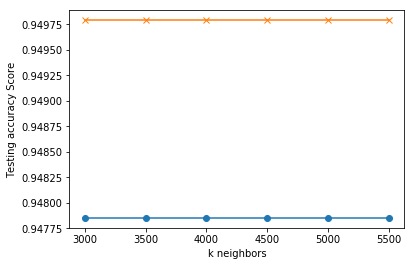

In [15]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
a = 3000
b = 6000
for k in range(a, b, 500):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(a, b, 500), train_scores, marker='o')
plt.plot(range(a, b, 500), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Note that k: XXXX seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=8000)
knn.fit(X_train, y_train)
print('k=8000 Test Acc: %.3f' % knn.score(X_test, y_test))

In [17]:
predictions = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.40      0.04      0.08      1856
           1       0.95      1.00      0.97     35109

   micro avg       0.95      0.95      0.95     36965
   macro avg       0.68      0.52      0.52     36965
weighted avg       0.92      0.95      0.93     36965



In [19]:
df4 = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [20]:
df4.head(50)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
